In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import pandas_datareader as pweb

In [4]:
from datetime import datetime

In [9]:
#日本の株価を取得
#SNE sony TM トヨタ自動車
japan_companies = ['SNE','TM']

In [10]:
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

In [11]:
for stock in japan_companies:
    globals()[stock] = pweb.DataReader(stock, 'iex', start, end)

In [12]:
SNE.head()

,open,high,low,close,volume
date,,,,,
2017-11-30,46.6855,46.7254,46.3664,46.6655,1114345
2017-12-01,45.7282,45.8280,45.1998,45.4291,2193249
2017-12-04,46.1171,46.2069,45.6186,45.6485,992825
2017-12-05,45.6285,46.0673,45.5986,45.7382,555098
2017-12-06,44.8607,44.8807,44.5167,44.7810,971343


In [13]:
TM.head()

,open,high,low,close,volume
date,,,,,
2017-11-30,122.4934,122.9682,122.2996,122.4352,110645
2017-12-01,121.5243,121.7084,119.8574,120.5164,201265
2017-12-04,120.8459,121.0930,119.8865,120.0900,243396
2017-12-05,120.2063,120.9816,119.3244,119.8574,190275
2017-12-06,119.1985,119.4698,118.8399,119.1694,95709


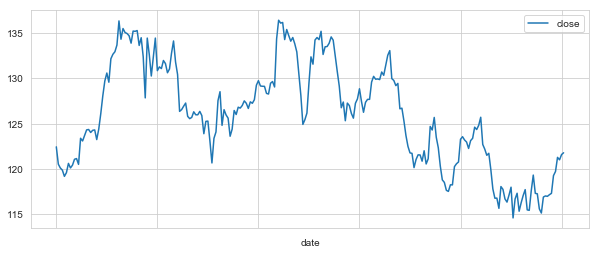

In [17]:
TM['close'].plot(legend = True, figsize = (10,4))

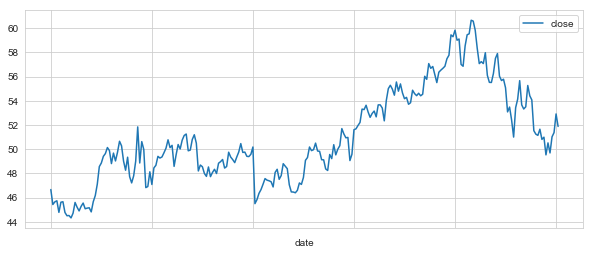

In [19]:
SNE['close'].plot(legend = True, figsize = (10,4))

In [20]:
#移動平均を求める
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    SNE[column_name] = SNE['close'].rolling(ma).mean()

In [21]:
SNE.head()

,open,high,low,close,volume,MA 10,MA 20,MA 50
date,,,,,,,,
2017-11-30,46.6855,46.7254,46.3664,46.6655,1114345,NaN,NaN,NaN
2017-12-01,45.7282,45.8280,45.1998,45.4291,2193249,NaN,NaN,NaN
2017-12-04,46.1171,46.2069,45.6186,45.6485,992825,NaN,NaN,NaN
2017-12-05,45.6285,46.0673,45.5986,45.7382,555098,NaN,NaN,NaN
2017-12-06,44.8607,44.8807,44.5167,44.7810,971343,NaN,NaN,NaN


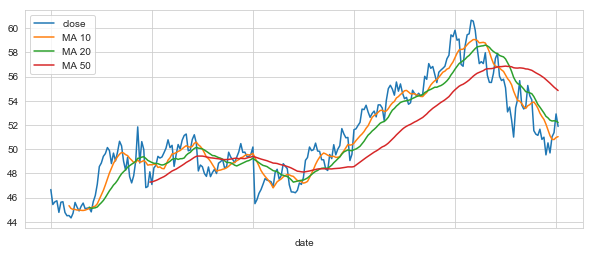

In [25]:
SNE[['close','MA 10','MA 20','MA 50']].plot(legend = True, subplots = False, figsize = (10,4))

In [26]:
#Daily Returnは終値の推移
SNE['Daily Return'] = SNE['close'].pct_change()

In [27]:
SNE.head()

,open,high,low,close,volume,MA 10,MA 20,MA 50,Daily Return
date,,,,,,,,,
2017-11-30,46.6855,46.7254,46.3664,46.6655,1114345,NaN,NaN,NaN,NaN
2017-12-01,45.7282,45.8280,45.1998,45.4291,2193249,NaN,NaN,NaN,-0.026495
2017-12-04,46.1171,46.2069,45.6186,45.6485,992825,NaN,NaN,NaN,0.004830
2017-12-05,45.6285,46.0673,45.5986,45.7382,555098,NaN,NaN,NaN,0.001965
2017-12-06,44.8607,44.8807,44.5167,44.7810,971343,NaN,NaN,NaN,-0.020928


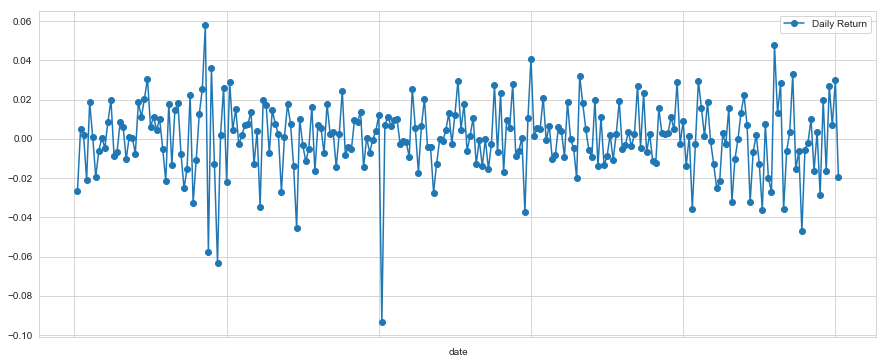

In [33]:
SNE['Daily Return'].plot(legend = True, figsize = (15,6), linestyle = '-', marker = 'o')

/Users/misuhiroshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


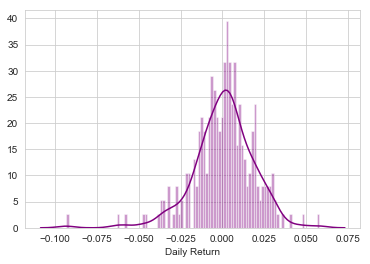

In [34]:
sns.distplot(SNE['Daily Return'].dropna(), bins = 100, color = 'purple')

In [37]:
closing_df = DataFrame([])
japan_companies = ['SNE','TM']
for stock in japan_companies:
    closing_df[stock] = pweb.DataReader(stock,'iex', start, end)['close']

In [40]:
closing_df.head()

,SNE,TM
date,,
2017-11-30,46.6655,122.4352
2017-12-01,45.4291,120.5164
2017-12-04,45.6485,120.0900
2017-12-05,45.7382,119.8574
2017-12-06,44.7810,119.1694


In [41]:
jp_comp_rets = closing_df.pct_change()

In [42]:
jp_comp_rets.head()

,SNE,TM
date,,
2017-11-30,NaN,NaN
2017-12-01,-0.026495,-0.015672
2017-12-04,0.004830,-0.003538
2017-12-05,0.001965,-0.001937
2017-12-06,-0.020928,-0.005740


/Users/misuhiroshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


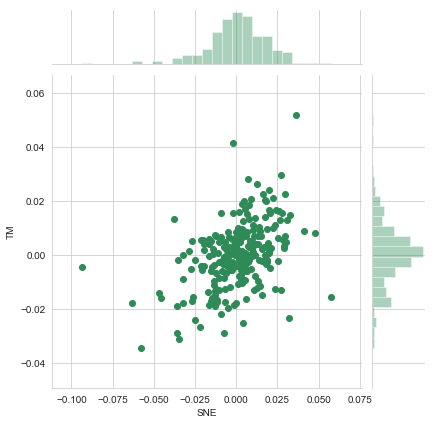

In [47]:
sns.jointplot('SNE', 'TM', jp_comp_rets, kind = 'scatter', color = 'seagreen')

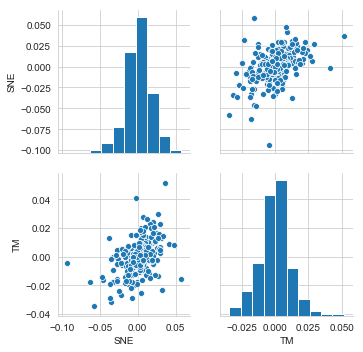

In [48]:
sns.pairplot(jp_comp_rets.dropna())

/Users/misuhiroshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


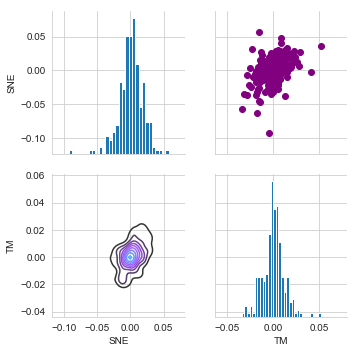

In [57]:
return_fig = sns.PairGrid(jp_comp_rets.dropna())
return_fig.map_upper(plt.scatter, color = 'purple')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

/Users/misuhiroshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


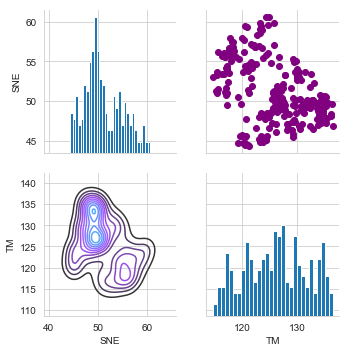

In [58]:
return_fig = sns.PairGrid(closing_df)
return_fig.map_upper(plt.scatter, color = 'purple')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

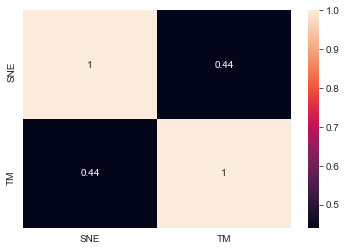

In [59]:
sns.heatmap(jp_comp_rets.corr(), annot = True)

In [60]:
rets = jp_comp_rets.dropna()

In [61]:
rets.head()

,SNE,TM
date,,
2017-12-01,-0.026495,-0.015672
2017-12-04,0.004830,-0.003538
2017-12-05,0.001965,-0.001937
2017-12-06,-0.020928,-0.005740
2017-12-07,0.018704,0.003415


In [62]:
SNE.head()

,open,high,low,close,volume,MA 10,MA 20,MA 50,Daily Return
date,,,,,,,,,
2017-11-30,46.6855,46.7254,46.3664,46.6655,1114345,NaN,NaN,NaN,NaN
2017-12-01,45.7282,45.8280,45.1998,45.4291,2193249,NaN,NaN,NaN,-0.026495
2017-12-04,46.1171,46.2069,45.6186,45.6485,992825,NaN,NaN,NaN,0.004830
2017-12-05,45.6285,46.0673,45.5986,45.7382,555098,NaN,NaN,NaN,0.001965
2017-12-06,44.8607,44.8807,44.5167,44.7810,971343,NaN,NaN,NaN,-0.020928


/Users/misuhiroshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


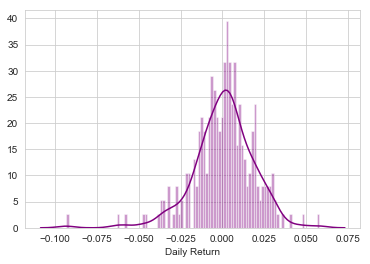

In [65]:
sns.distplot(SNE['Daily Return'].dropna(), bins = 100, color = 'purple')

In [68]:
rets['SNE'].quantile(0.05)

-0.030445564911525946

In [69]:
days = 365
mu = rets.mean()['SNE']
dt = 1 / days
sigma = rets.std()['SNE']

In [71]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + price[x-1]*(shock[x] + drift[x])
    return price

In [80]:
SNE.head()

,open,high,low,close,volume,MA 10,MA 20,MA 50,Daily Return
date,,,,,,,,,
2017-11-30,46.6855,46.7254,46.3664,46.6655,1114345,NaN,NaN,NaN,NaN
2017-12-01,45.7282,45.8280,45.1998,45.4291,2193249,NaN,NaN,NaN,-0.026495
2017-12-04,46.1171,46.2069,45.6186,45.6485,992825,NaN,NaN,NaN,0.004830
2017-12-05,45.6285,46.0673,45.5986,45.7382,555098,NaN,NaN,NaN,0.001965
2017-12-06,44.8607,44.8807,44.5167,44.7810,971343,NaN,NaN,NaN,-0.020928


In [82]:
SNE.iloc[0,3]

46.6655

Text(0.5,1,'Monte Carlo Anaysis for Sony')

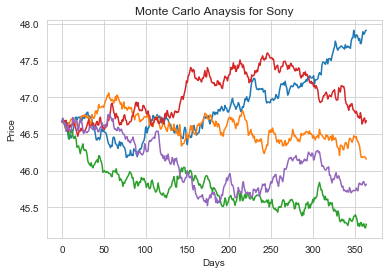

In [83]:
start_price = SNE.iloc[0,3]
#SNE.iloc[0,3]は0行３列のところを取り出している。

for run in range(5):
    #stock_monte_carloはpriceという配列を返すから
    plt.plot(stock_monte_carlo(start_price, days , mu , sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Anaysis for Sony')

In [84]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold = 5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days -1]

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([43.66684723, 43.70009547, 43.7333437 , ..., 50.24999791,
        50.28324615, 50.31649438]),
 <a list of 200 Patch objects>)

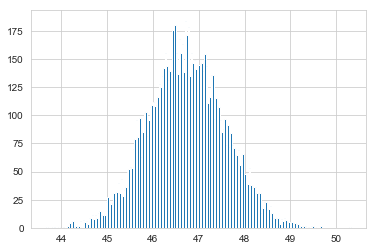

In [85]:
plt.hist(simulations, bins = 200)